<a href="https://colab.research.google.com/github/hinazargham/DeepLearning_ColabNotebooks/blob/main/Regression_Problem_and_Cost_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression Problem and Cost Function**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
import io
from google.colab import files
uploaded = files.upload()

Saving weight-height.csv to weight-height.csv


## **Linear Regression without Kears**

In [5]:
df = pd.read_csv(io.BytesIO(uploaded['weight-height.csv']))
df.head

<bound method NDFrame.head of       Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[10000 rows x 3 columns]>

In [6]:
X=df[['Height']].values
y_true=df[['Weight']].values

In [7]:
X

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

In [8]:
y_true

array([[241.89356318],
       [162.31047252],
       [212.74085556],
       ...,
       [128.47531878],
       [163.85246135],
       [113.64910268]])

In [9]:
def line(x, w=0, b=0):
  return w*x+b

def mean_squared_error(y_true,y_pred):
  s=(y_true-y_pred)**2
  return np.sqrt(s.mean())

# making loss function/cost function
# true value - predict value and their square

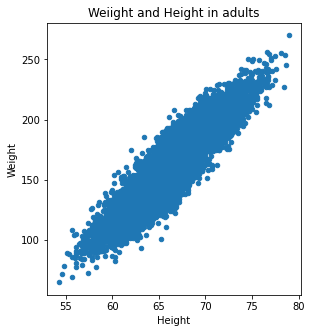

In [10]:
plt.figure(figsize=(10,5))
axl=plt.subplot(121)
df.plot(kind='scatter', x='Height', y='Weight', title='Weiight and Height in adults', ax=axl)


Text(0.5, 0, 'b')

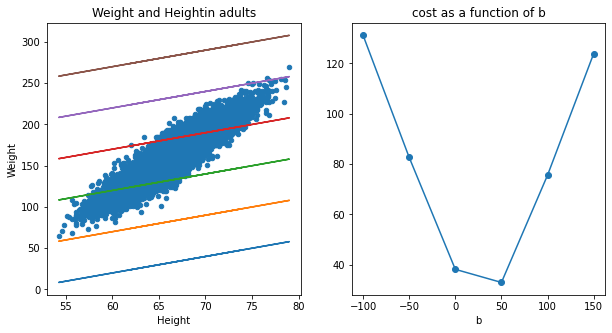

In [19]:
plt.figure(figsize=(10,5))
ax1=plt.subplot(121)
df.plot(kind="scatter",
       x="Height",
       y="Weight",
        title="Weight and Heightin adults" , ax= ax1)
bs=np.array([-100, -50, 0, 50, 100, 150])
mses=[]
for b in bs:
    y_pred=line(X, w=2, b=b)
    mse=mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X,y_pred)
    
ax2= plt.subplot(122)
plt.plot(bs, mses, 'o-')
plt.title('cost as a function of b')
plt.xlabel('b')

## **Linear Regression with Kears**

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [21]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [22]:
df.tail()

,Gender,Height,Weight
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
9999,Female,61.944246,113.649103


In [23]:
X= df[['Height']].values
y_true=df[['Weight']]

In [25]:
X.shape

(10000, 1)

In [26]:
y_true.shape

(10000, 1)

In [27]:
model = Sequential()
model.add(Dense(1, input_shape=(1,)))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [31]:
model.fit(X, y_true, epochs=40)

Epoch 1/40
313/313 [==============================] - 1s 912us/step - loss: 2967.7839
Epoch 2/40
313/313 [==============================] - 0s 877us/step - loss: 562.7040
Epoch 3/40
313/313 [==============================] - 0s 912us/step - loss: 547.5184
Epoch 4/40
313/313 [==============================] - 0s 885us/step - loss: 486.9127
Epoch 5/40
313/313 [==============================] - 0s 859us/step - loss: 464.1584
Epoch 6/40
313/313 [==============================] - 0s 884us/step - loss: 395.0627
Epoch 7/40
313/313 [==============================] - 0s 838us/step - loss: 379.8363
Epoch 8/40
313/313 [==============================] - 0s 949us/step - loss: 355.8460
Epoch 9/40
313/313 [==============================] - 0s 881us/step - loss: 320.0994
Epoch 10/40
313/313 [==============================] - 0s 899us/step - loss: 275.6593
Epoch 11/40
313/313 [==============================] - 0s 879us/step - loss: 273.5442
Epoch 12/40
313/313 [==============================] - 0s 916u

In [32]:
y_pred=model.predict(X)
y_pred

array([[202.04529 ],
       [164.2951  ],
       [204.0061  ],
       ...,
       [127.67175 ],
       [166.17572 ],
       [113.334076]], dtype=float32)

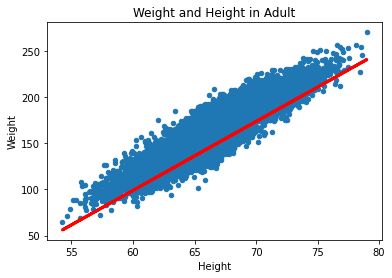

In [33]:
df.plot(kind='scatter',
       x='Height',
       y='Weight',
    title='Weight and Height in Adult')
plt.plot(X, y_pred, color='red', linewidth=3)

In [37]:
w,b = model.get_weights()
display(w)
display(b)

array([[7.452988]], dtype=float32)

array([-348.33563], dtype=float32)

In [40]:
print("The value of w is" ,w, "and the value of b is", b)

The value of w is [[7.452988]] and the value of b is [-348.33563]


In [41]:
model.predict([[200]])

array([[1142.262]], dtype=float32)

## **Plot graph using the predicted values (manually)**

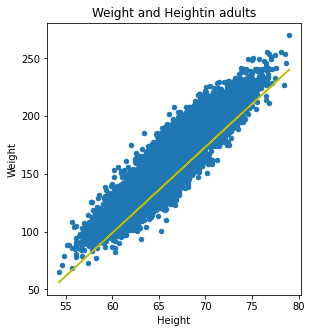

In [58]:
plt.figure(figsize=(10,5))
ax1=plt.subplot(121)
df.plot(kind="scatter",
       x="Height",
       y="Weight",
        title="Weight and Heightin adults" , ax= ax1)
bs=np.array([-348.33563])
mses=[]
for b in bs:
    y_pred=line(X, w=7.452988, b=b)
    mse=mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred, 'y')